In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error

/Users/nigle/untitled1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#读取文档
data = pd.read_csv('../Untitled Folder 2/kc_house_data.csv')
#查看文档属性
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
# id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
# ID，日期，价格，卧室，浴室，平房，停车场，楼层，滨水区，景观，条件，等级，平房_以上，平房_地下室，Yr__建，YR_翻新，邮编，LAT，长，平房_生活15，平方尺_乐透15

In [4]:
#属性空值
print(data.isnull().any().sum(), '/', len(data.columns))
#样本空值
print(data.isnull().any().sum(), '/', len(data))

0 / 21
0 / 21613


In [5]:
#去除id、date后的数据
features = data.iloc[:,3:].columns.tolist()
#prcie
target = data.iloc[:,2].name

In [6]:
#利用皮尔森系数观测变量向量与目标向量之间的关系
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0] #取出相关系数，【-1， 1】之间

In [7]:
#观测系数较大的几个属性
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [8]:
#首先的取出sqft_living、grade与目标标量，观察变量之间关系
y = data.loc[:,['sqft_living', 'grade', target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

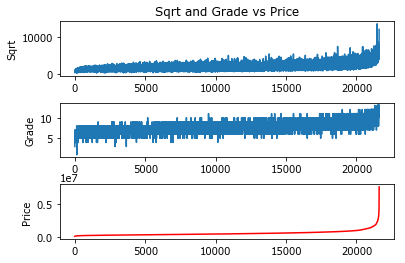

In [9]:
%matplotlib inline
plt.subplot(3, 1, 1)
plt.plot(x, y[:, 0])
plt.title('Sqrt and Grade vs Price')
plt.ylabel('Sqrt')

plt.subplot(3,1,2)
plt.plot(x, y[:, 1])
plt.ylabel('Grade')

plt.subplot(3,1,3)
plt.plot(x,y[:,2],'r')
plt.ylabel('Price')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [10]:
regr = linear_model.LinearRegression()
#取出相关系数较大的几个特征，组成新数据
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','bedrooms']]

In [11]:
X = new_data.values
y = data.price.values

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [13]:
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)

/Users/nigle/untitled1/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [14]:
regr.score(X_test, y_test)

0.6902660387171667

In [15]:
print('MAE:',mean_absolute_error(y_test,predictions)) 
print('MSE:',mean_squared_error(y_test,predictions)) 
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions))) 

MAE: 127727.66786776707
MSE: 47301959771.947685
RMSE: 217490.13718315525


In [16]:
#利用线性拟合的结果不太理想，尝试xgb回归
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08,
                           gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)

In [17]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [18]:
predictions_1 = xgb.predict(X_test)
explained_variance_score(predictions_1, y_test)

0.8009708382228433

In [19]:
print('MAE:',mean_absolute_error(y_test,predictions_1)) 
print('MSE:',mean_squared_error(y_test,predictions_1)) 
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_1))) 
#训练模型好于线性拟合

MAE: 82560.44230713625
MSE: 24020285655.887707
RMSE: 154984.7916922422
